### In this document, I am working with the new data sets 
### Observation Date: 27 April 2022

In [25]:
import numpy as np
from astropy.io import fits, ascii
from astropy.wcs import WCS
from astropy.nddata.utils import Cutout2D
from astropy import units as u
from astropy.coordinates import SkyCoord

import matplotlib.pyplot as plt
import matplotlib.colors as colors
import cmasher as cms

from regions import EllipseSkyRegion, RectangleSkyRegion

from matplotlib import rc
rc('text', usetex=True)
font = {'family' : 'serif',
        'weight' : 'bold',
        'size'   : '14'}
rc('font', **font)

# Zoomed out image of Ter 1

Set OBSGEO-B to    34.078827 from OBSGEO-[XYZ].
Set OBSGEO-H to     2115.607 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]


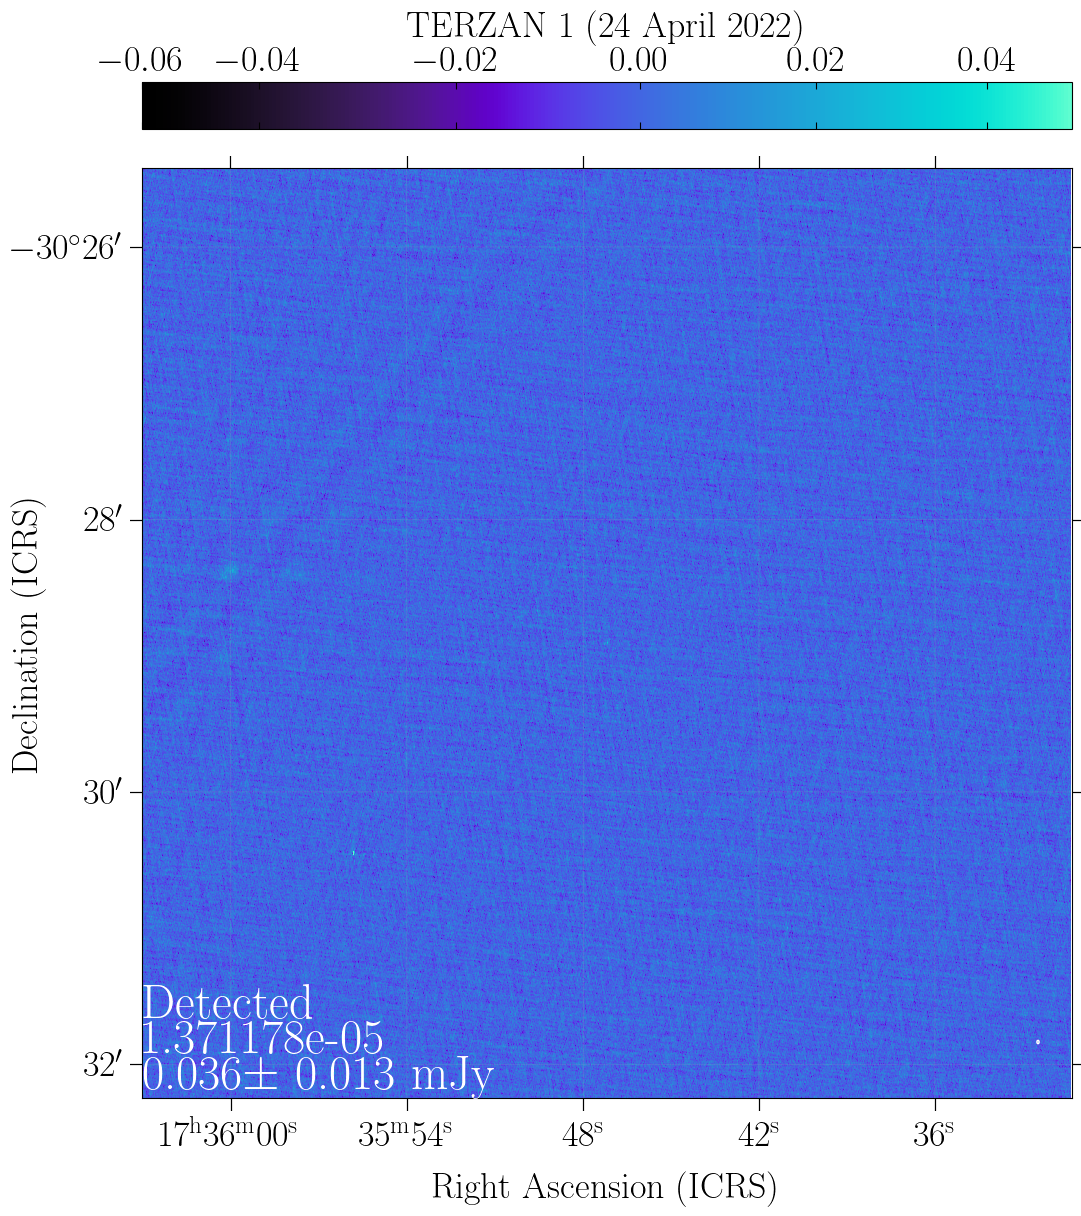

In [136]:
fig = plt.figure(figsize=(12,11)) # define the image size
label_fsize = 26 # label font size
center = SkyCoord('17h35m47.19s', '-30d28m50.2s', frame='icrs') # 17:35:47.190000 -30.28.50.20000
box_bkg = [150*u.arcmin,150*u.arcmin]
box_contour1 = [0.6*u.arcmin,0.6*3.5/3*u.arcmin]

# Defining fluxes
flux = '0.036$\pm$ 0.013 mJy'
detected = 'Detected'
rms = '1.371178e-05'

bkg_fname = 'SI1065_ter1-2022.fits'
bkg_im  =  fits.open(bkg_fname)
bkg_data = bkg_im[0].data[0][0]*1e3
bkg_wcs = WCS(bkg_im[0].header, naxis=2)
bkg_cut = Cutout2D(bkg_data, center, box_bkg, wcs=bkg_wcs)

ax = plt.subplot2grid([1, 1], [0, 0], fig=fig, projection=bkg_cut.wcs)

cmap = cms.cosmic
cmap.set_bad('black')
cmap_norm = colors.PowerNorm(0.9, vmin=-0.05, vmax=0.05)

ax_bkimg = ax.imshow(bkg_cut.data,
                     cmap = cmap,
                     norm = cmap_norm,
                     aspect = 'equal',
                     origin = 'lower', 
                     interpolation = 'none',
                     rasterized = True, transform=ax.get_transform(bkg_cut.wcs))

cbar = fig.colorbar(ax_bkimg, ax=ax,shrink=1., orientation='horizontal', pad=-1.2)
cbar.ax.set_title('TERZAN 1 (24 April 2022)',fontsize=label_fsize,ha='center')
cbar.ax.xaxis.set_ticks_position('top')
cbar.ax.tick_params(direction='in',length=5,bottom=True,top=True)
cbar.ax.xaxis.set_tick_params(labelsize=label_fsize)

meerkat_beam = EllipseSkyRegion(center.spherical_offsets_by(-190*u.arcsec,-180*u.arcsec),
                                bkg_im[0].header['BMIN']*u.deg,bkg_im[0].header['BMAJ']*u.deg,(bkg_im[0].header['BPA'])*u.deg)
meerkat_beam_pix_reg = meerkat_beam.to_pixel(bkg_cut.wcs)
meerkat_beam_pix_reg.visual['color'] = 'w'
meerkat_beam_pix_reg.visual['facecolor'] = '0.5'
meerkat_beam_pix_reg.visual['fill'] = True

meerkat_beam_pix_reg.visual['linewidth'] = 2.0
meerkat_beam_pix_reg.plot(ax=ax)

ax.grid(linewidth=0.5,alpha=0.2)
ax.tick_params(axis='both', which='major', length=9)
ax.set_ylabel(r"Declination (ICRS)", size=label_fsize,labelpad=-0.5)
ax.set_xlabel(r"Right Ascension (ICRS)", size=label_fsize,ha='center')
ax.tick_params(labelsize=label_fsize)

ax.text(5, 1, str(flux),fontsize=35,color='w',verticalalignment='bottom')
ax.text(5, 250, str(rms),fontsize=35,color='w',verticalalignment='center')
ax.text(5, 500, str(detected),fontsize=35,color='w',verticalalignment='top')

plt.savefig('TERZAN1.2022.zoomed-out.png', bbox_inches = 'tight' )

# Zoomed in image of Ter 1


Set OBSGEO-B to    34.078827 from OBSGEO-[XYZ].
Set OBSGEO-H to     2115.607 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]


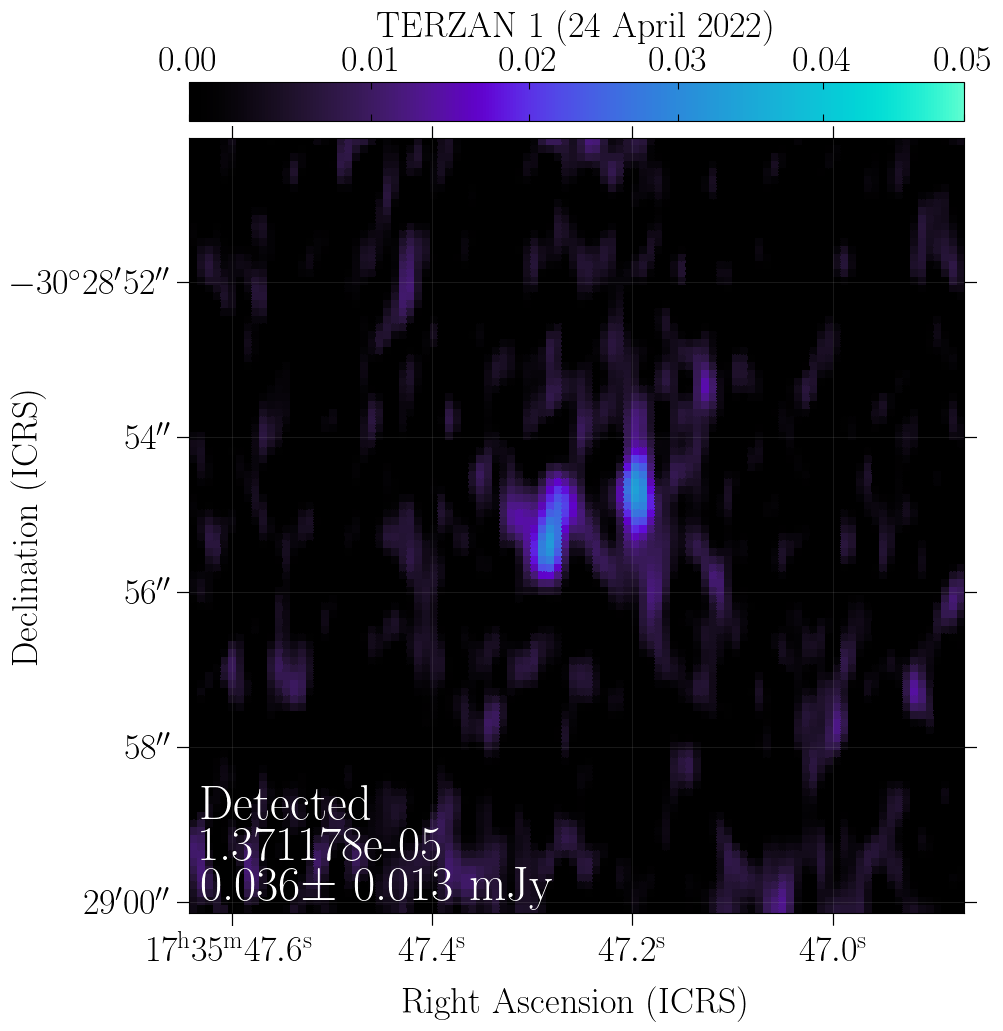

In [7]:
fig = plt.figure(figsize=(10, 9))
label_fsize = 26 # label font s 
center = SkyCoord('17h35m47.25s', '-30d28m55.2s', frame='icrs') # 17:35:47.260000 -30.28.54.00000
# 17:35:47.190000 -30.28.50.20000
box_bkg = [10*u.arcsec,10*u.arcsec]
box_contour1 = [0.6*u.arcmin,0.6*3.5/3*u.arcmin]

# Defining fluxes
flux = '0.036$\pm$ 0.013 mJy'
detected = 'Detected'
rms = '1.371178e-05'

bkg_fname = 'SI1065_ter1-2022.fits'
bkg_im  =  fits.open(bkg_fname)
bkg_data = bkg_im[0].data[0][0]*1e3
bkg_wcs = WCS(bkg_im[0].header, naxis=2)
bkg_cut = Cutout2D(bkg_data, center, box_bkg, wcs=bkg_wcs)

ax = plt.subplot2grid([1, 1], [0, 0], fig=fig, projection=bkg_cut.wcs)

cmap = cms.cosmic
cmap.set_bad('black')
# cmap_norm = colors.PowerNorm(0.9, vmin=-0.05, vmax=0.05) 
cmap_norm = colors.PowerNorm(0.9, vmin=0, vmax=0.05) 
ax_bkimg = ax.imshow(bkg_cut.data,
                     cmap = cmap,
                     norm = cmap_norm,
                     aspect = 'equal',
                     origin = 'lower', 
                     interpolation = 'none',
                     rasterized = True, transform=ax.get_transform(bkg_cut.wcs))

cbar = fig.colorbar(ax_bkimg, ax=ax, shrink=1., orientation='horizontal', pad=-1.2)
cbar.ax.set_title('TERZAN 1 (24 April 2022)',fontsize=label_fsize,ha='center')
cbar.ax.xaxis.set_ticks_position('top')
cbar.ax.tick_params(direction='in',length=5,bottom=True,top=True)
cbar.ax.xaxis.set_tick_params(labelsize=label_fsize)

meerkat_beam = EllipseSkyRegion(center.spherical_offsets_by(-6*u.arcsec,-5.5*u.arcsec),
                                bkg_im[0].header['BMIN']*u.deg,bkg_im[0].header['BMAJ']*u.deg,(bkg_im[0].header['BPA'])*u.deg)
meerkat_beam_pix_reg = meerkat_beam.to_pixel(bkg_cut.wcs)
meerkat_beam_pix_reg.visual['color'] = 'w'
meerkat_beam_pix_reg.visual['facecolor'] = '0.5'
meerkat_beam_pix_reg.visual['fill'] = True

meerkat_beam_pix_reg.visual['linewidth'] = 2.0
meerkat_beam_pix_reg.plot(ax=ax)

ax.grid(linewidth=0.5,alpha=0.2)
ax.tick_params(axis='both', which='major', length=9)
ax.set_ylabel(r"Declination (ICRS)", size=label_fsize,labelpad=-0.5)
ax.set_xlabel(r"Right Ascension (ICRS)", size=label_fsize,ha='center')
ax.tick_params(labelsize=label_fsize)

ax.text(1, 0, str(flux),fontsize=35,color='w',verticalalignment='bottom')
ax.text(1, 8, str(rms),fontsize=35,color='w',verticalalignment='center')
ax.text(1, 16, str(detected),fontsize=35,color='w',verticalalignment='top')

plt.savefig('TERZAN1.2022.zoomed-in.png', bbox_inches = 'tight' )

Set OBSGEO-B to    34.078827 from OBSGEO-[XYZ].
Set OBSGEO-H to     2115.607 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]


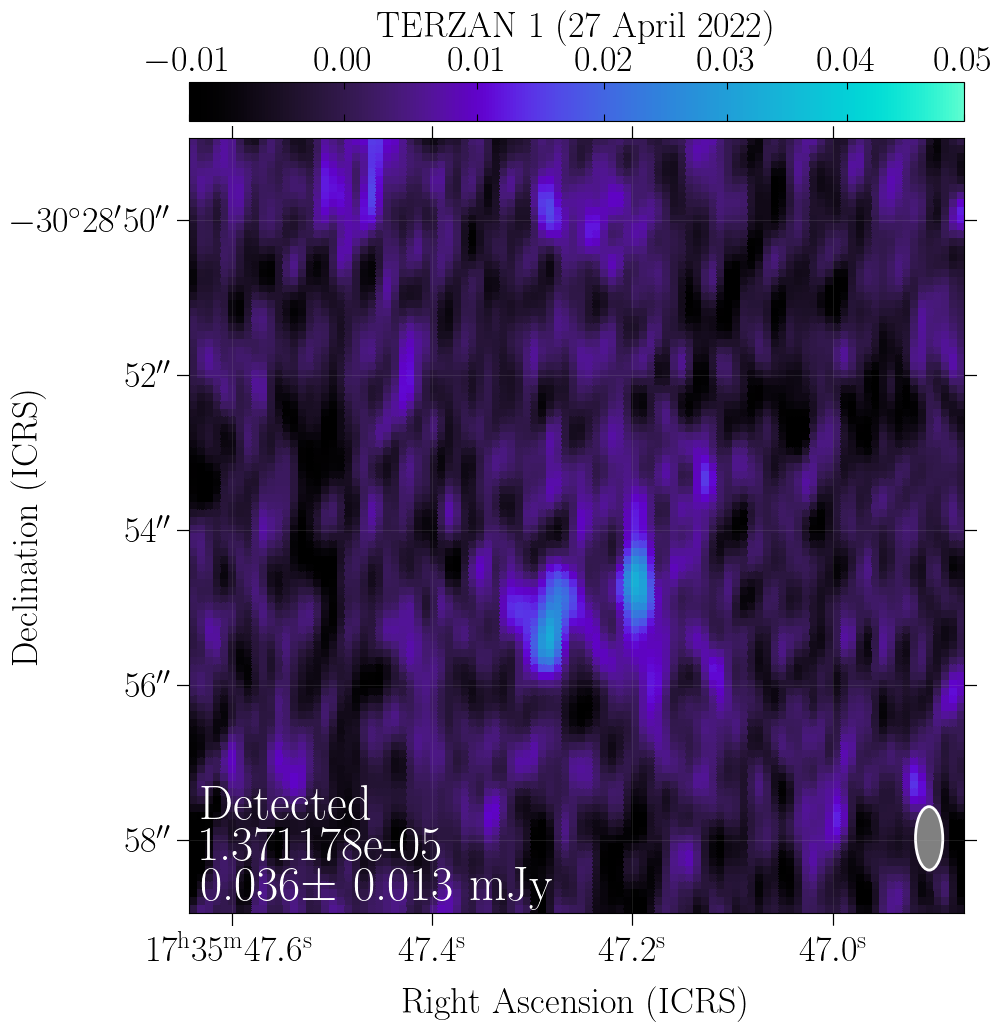

In [40]:
fig = plt.figure(figsize=(10, 9))
label_fsize = 26 # label font s 
center = SkyCoord('17h35m47.25s', '-30d28m54.0s', frame='icrs') # 17:35:47.260000 -30.28.54.00000
# '17h35m47.25s', '-30d28m55.2s'

box_bkg = [10*u.arcsec,10*u.arcsec]
box_contour1 = [0.6*u.arcmin,0.6*3.5/3*u.arcmin]

# Defining fluxes
flux = '0.036$\pm$ 0.013 mJy'
detected = 'Detected'
rms = '1.371178e-05'

bkg_fname = 'SI1065_ter1-2022.fits'
bkg_im  =  fits.open(bkg_fname)
bkg_data = bkg_im[0].data[0][0]*1e3
bkg_wcs = WCS(bkg_im[0].header, naxis=2)
bkg_cut = Cutout2D(bkg_data, center, box_bkg, wcs=bkg_wcs)

ax = plt.subplot2grid([1, 1], [0, 0], fig=fig, projection=bkg_cut.wcs)

cmap = cms.cosmic
cmap.set_bad('black')
# cmap_norm = colors.PowerNorm(0.9, vmin=-0.05, vmax=0.05) 
cmap_norm = colors.PowerNorm(0.9, vmin=-0.01, vmax=0.05) 
ax_bkimg = ax.imshow(bkg_cut.data,
                     cmap = cmap,
                     norm = cmap_norm,
                     aspect = 'equal',
                     origin = 'lower', 
                     interpolation = 'none',
                     rasterized = True, transform=ax.get_transform(bkg_cut.wcs))

cbar = fig.colorbar(ax_bkimg, ax=ax, shrink=1., orientation='horizontal', pad=-1.2)
cbar.ax.set_title('TERZAN 1 (27 April 2022)',fontsize=label_fsize,ha='center')
cbar.ax.xaxis.set_ticks_position('top')
cbar.ax.tick_params(direction='in',length=5,bottom=True,top=True)
cbar.ax.xaxis.set_tick_params(labelsize=label_fsize)

meerkat_beam = EllipseSkyRegion(center.spherical_offsets_by(-4.5*u.arcsec,-4*u.arcsec),
                                bkg_im[0].header['BMIN']*u.deg,bkg_im[0].header['BMAJ']*u.deg,(bkg_im[0].header['BPA'])*u.deg)
meerkat_beam_pix_reg = meerkat_beam.to_pixel(bkg_cut.wcs)
meerkat_beam_pix_reg.visual['color'] = 'w'
meerkat_beam_pix_reg.visual['facecolor'] = '0.5'
meerkat_beam_pix_reg.visual['fill'] = True

meerkat_beam_pix_reg.visual['linewidth'] = 2.0
meerkat_beam_pix_reg.plot(ax=ax)

ax.grid(linewidth=0.5,alpha=0.2)
ax.tick_params(axis='both', which='major', length=9)
ax.set_ylabel(r"Declination (ICRS)", size=label_fsize,labelpad=-0.5)
ax.set_xlabel(r"Right Ascension (ICRS)", size=label_fsize,ha='center')
ax.tick_params(labelsize=label_fsize)

ax.text(1, 0, str(flux),fontsize=35,color='w',verticalalignment='bottom')
ax.text(1, 8, str(rms),fontsize=35,color='w',verticalalignment='center')
ax.text(1, 16, str(detected),fontsize=35,color='w',verticalalignment='top')

plt.savefig('TERZAN1.2022.zoomed-in.png', bbox_inches = 'tight' )

Set OBSGEO-B to    34.078827 from OBSGEO-[XYZ].
Set OBSGEO-H to     2115.607 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]


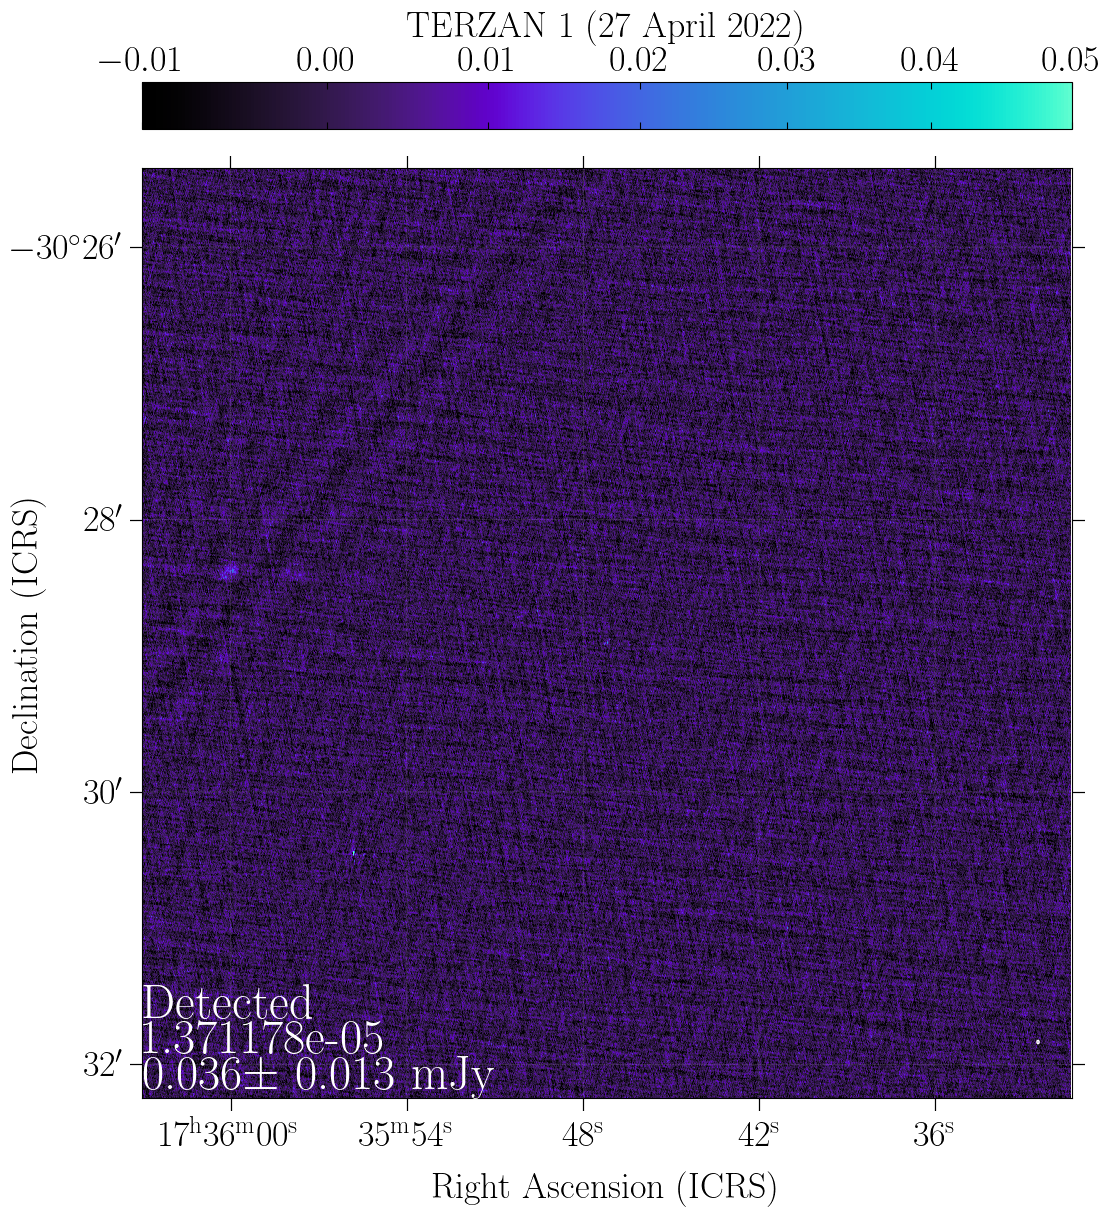

In [39]:
fig = plt.figure(figsize=(12,11)) # define the image size
label_fsize = 26 # label font size
center = SkyCoord('17h35m47.19s', '-30d28m50.2s', frame='icrs') # 17:35:47.190000 -30.28.50.20000
box_bkg = [150*u.arcmin,150*u.arcmin]
box_contour1 = [0.6*u.arcmin,0.6*3.5/3*u.arcmin]

# Defining fluxes
flux = '0.036$\pm$ 0.013 mJy'
detected = 'Detected'
rms = '1.371178e-05'

bkg_fname = 'SI1065_ter1-2022.fits'
bkg_im  =  fits.open(bkg_fname)
bkg_data = bkg_im[0].data[0][0]*1e3
bkg_wcs = WCS(bkg_im[0].header, naxis=2)
bkg_cut = Cutout2D(bkg_data, center, box_bkg, wcs=bkg_wcs)

ax = plt.subplot2grid([1, 1], [0, 0], fig=fig, projection=bkg_cut.wcs)

cmap = cms.cosmic
cmap.set_bad('black')
cmap_norm = colors.PowerNorm(0.9, vmin=-0.01, vmax=0.05)

ax_bkimg = ax.imshow(bkg_cut.data,
                     cmap = cmap,
                     norm = cmap_norm,
                     aspect = 'equal',
                     origin = 'lower', 
                     interpolation = 'none',
                     rasterized = True, transform=ax.get_transform(bkg_cut.wcs))

cbar = fig.colorbar(ax_bkimg, ax=ax,shrink=1., orientation='horizontal', pad=-1.2)
cbar.ax.set_title('TERZAN 1 (27 April 2022)',fontsize=label_fsize,ha='center')
cbar.ax.xaxis.set_ticks_position('top')
cbar.ax.tick_params(direction='in',length=5,bottom=True,top=True)
cbar.ax.xaxis.set_tick_params(labelsize=label_fsize)

meerkat_beam = EllipseSkyRegion(center.spherical_offsets_by(-190*u.arcsec,-180*u.arcsec),
                                bkg_im[0].header['BMIN']*u.deg,bkg_im[0].header['BMAJ']*u.deg,(bkg_im[0].header['BPA'])*u.deg)
meerkat_beam_pix_reg = meerkat_beam.to_pixel(bkg_cut.wcs)
meerkat_beam_pix_reg.visual['color'] = 'w'
meerkat_beam_pix_reg.visual['facecolor'] = '0.5'
meerkat_beam_pix_reg.visual['fill'] = True

meerkat_beam_pix_reg.visual['linewidth'] = 2.0
meerkat_beam_pix_reg.plot(ax=ax)

ax.grid(linewidth=0.5,alpha=0.2)
ax.tick_params(axis='both', which='major', length=9)
ax.set_ylabel(r"Declination (ICRS)", size=label_fsize,labelpad=-0.5)
ax.set_xlabel(r"Right Ascension (ICRS)", size=label_fsize,ha='center')
ax.tick_params(labelsize=label_fsize)

ax.text(5, 1, str(flux),fontsize=35,color='w',verticalalignment='bottom')
ax.text(5, 250, str(rms),fontsize=35,color='w',verticalalignment='center')
ax.text(5, 500, str(detected),fontsize=35,color='w',verticalalignment='top')

plt.savefig('TERZAN1.2022.zoomed-out.png', bbox_inches = 'tight' )

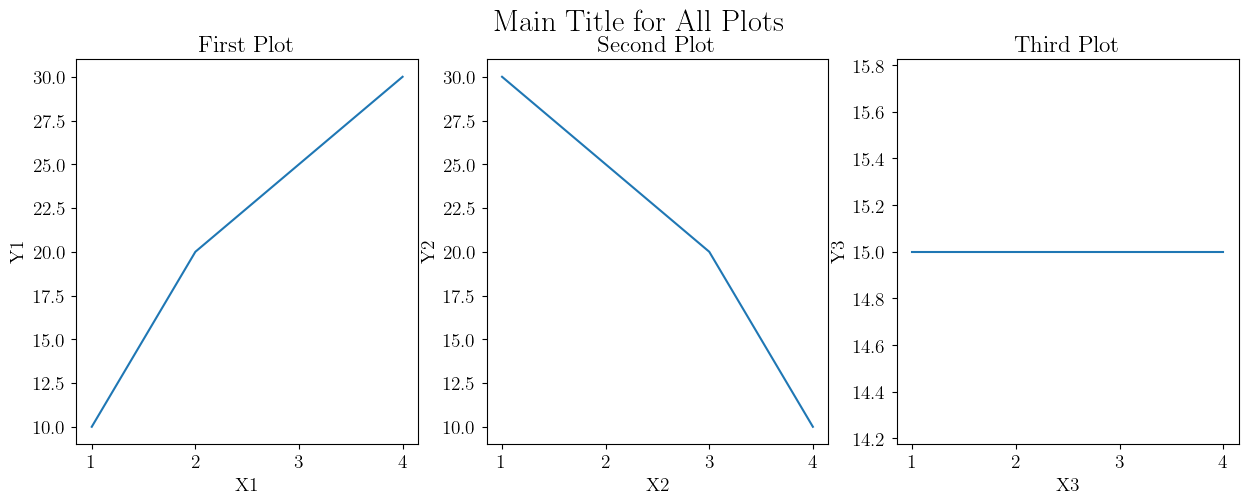

In [22]:
import matplotlib.pyplot as plt

# Create a figure with 3 subplots (3 Axes objects)
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Plot data on the first Axes (axes[0])
axes[0].plot([1, 2, 3, 4], [10, 20, 25, 30])
axes[0].set_title("First Plot")
axes[0].set_xlabel("X1")
axes[0].set_ylabel("Y1")

# Plot data on the second Axes (axes[1])
axes[1].plot([1, 2, 3, 4], [30, 25, 20, 10])
axes[1].set_title("Second Plot")
axes[1].set_xlabel("X2")
axes[1].set_ylabel("Y2")

# Plot data on the third Axes (axes[2])
axes[2].plot([1, 2, 3, 4], [15, 15, 15, 15])
axes[2].set_title("Third Plot")
axes[2].set_xlabel("X3")
axes[2].set_ylabel("Y3")

fig.suptitle("Main Title for All Plots", fontsize=22)

# Display the figure
plt.show()

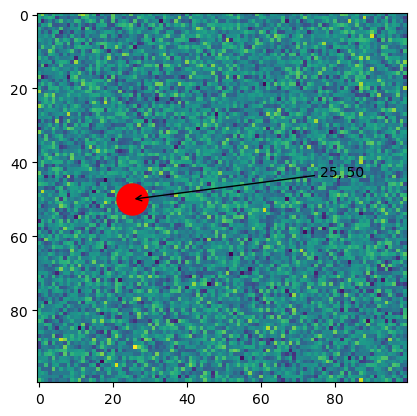

In [7]:
import matplotlib.pyplot as plt
import numpy as np

img = np.random.randn(100, 100)

plt.figure()
plt.imshow(img)
plt.annotate('25, 50', xy=(25, 50), xycoords='data',
             xytext=(0.5, 0.5), textcoords='figure fraction',
             arrowprops=dict(arrowstyle="->"))
plt.scatter(25, 50, s=500, c='red', marker='o')
plt.show()

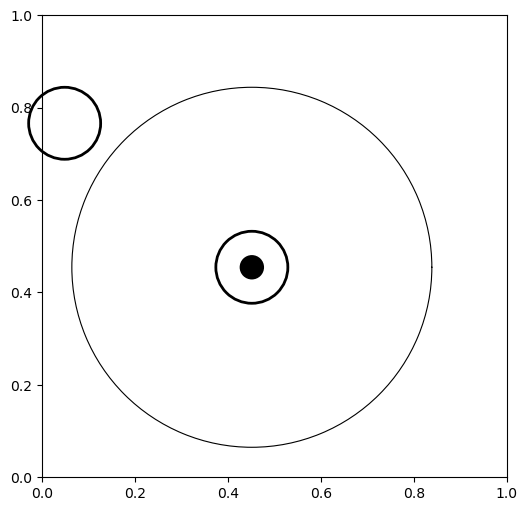

In [9]:
f = plt.figure(figsize=(6, 6))
ax = f.add_subplot(111)

box = ax.get_position()
axColor = plt.axes([box.x0 + 0.05, box.y0 + 0.05,
                    0.6, 0.6], projection='polar')

axColor.set_yticks([])
axColor.set_xticks([])
axColor.set_rlim(0, 50)

circle = plt.Circle((0., 0.), 10, transform=axColor.transData._b,
                   edgecolor='k', facecolor='None', linewidth=2)
axColor.add_artist(circle)
circle = plt.Circle((0., 0.), 3, transform=axColor.transData._b, 
                   color='k', linewidth=2)
axColor.add_artist(circle)

circle = plt.Circle((-0.02, 0.9), 0.1, transform=axColor.transAxes,
                   edgecolor='k', facecolor='None', linewidth=2, clip_on=False)
axColor.add_artist(circle)
# Cannot draw an X


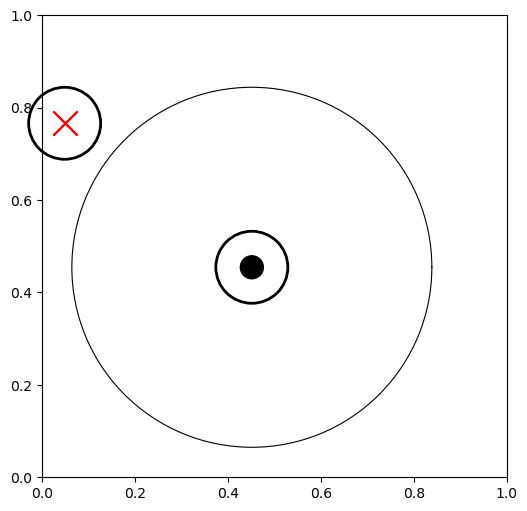

In [15]:
f = plt.figure(figsize=(6, 6))
ax = f.add_subplot(111)

box = ax.get_position()
axColor = plt.axes([box.x0 + 0.05, box.y0 + 0.05,
                    0.6, 0.6], projection='polar')

axColor.set_yticks([])
axColor.set_xticks([])
axColor.set_rlim(0, 50)

circle = plt.Circle((0., 0.), 10, transform=axColor.transData._b,
                   edgecolor='k', facecolor='None', linewidth=2)
axColor.add_artist(circle)
circle = plt.Circle((0., 0.), 3, transform=axColor.transData._b, 
                   color='k', linewidth=2)
axColor.add_artist(circle)

circle = plt.Circle((-0.02, 0.9), 0.1, transform=axColor.transAxes,
                   edgecolor='k', facecolor='None', linewidth=2, clip_on=False)

axColor.add_artist(circle)


mymarker = plt.scatter(-0.02, 0.9, s=300, c='red', transform=axColor.transAxes, marker='x', clip_on=False)
axColor.add_artist(mymarker)



# f.savefig('plot_with_x.png')

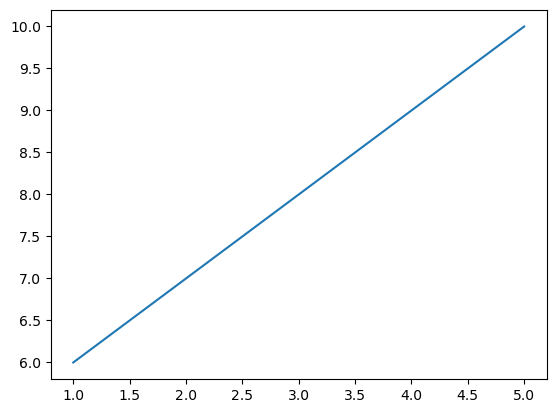

In [23]:
x = np.array([1, 2, 3, 4, 5])
y = np.array([6, 7, 8, 9, 10])

plt.plot(x, y)